# Stability of an explicit scheme for a nonlinear ODE

We consider the problem
$$\begin{equation*}
\left \{
\begin{array}{lcl}
u'(t)=-u^2(t)+u(t)+1, & t>0,\\
u(0)=1.
\end{array}
\right.
\end{equation*}
$$

To obtain an approximate solution $u_n$ of $u(n\delta t)$, we use an Euler Explicit scheme:
$$\begin{equation*}
\left \{
\begin{array}{lcl}
\frac{u_{n+1}-u_n}{\delta t}=-u_n^2+u_n+1, & n\in\mathbb{N},\\
u_0=1.
\end{array}
\right.
\end{equation*}
$$
It can be proved that $u$ is an increasing function such that $\lim_{t\rightarrow +\infty} u(t) = \frac{1+\sqrt{5}}{2}\approx 1.62$. 
Consequently we are looking for a sufficient criterion on $\delta t$ such that $(u_n)_{n\in\mathbb{N}}$ is an increasing sequence.


In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import display, Markdown

In [2]:
# Function defining the ODE
def f(x,t):
    return -x**2+x+1

Discretization step= 0.1


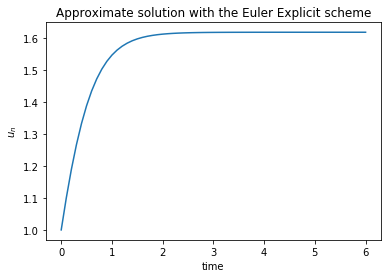

In [3]:
# Time discretization
Tf=6
dt=0.1
t=np.arange(0,Tf+dt,dt)
Nt=len(t)
print ('Discretization step=',dt)

# ODE resolution with an Euler-Explicit scheme
u_EE=np.zeros(Nt)
u_EE[0]=1
for n in range(0,Nt-1):
    u_EE[n+1]=u_EE[n]+dt*f(u_EE[n],t[n])

# plot of the approximate solution
plt.figure()
plt.plot(t,u_EE)
plt.xlabel('time')
plt.ylabel(r'$u_n$')
plt.title('Approximate solution with the Euler Explicit scheme')

plt.show()

In [4]:
display(Markdown(r'$\min_n \ (u_{n+1}-u_n)=$'))
a=min(u_EE[1:Nt-1]-u_EE[0:Nt-2])
print(a,'\n')
if a<0:
    display(Markdown(rf'So, for $\delta t={dt}$, the Euler Explicit scheme does not give an increasing sequence.'))
else:
    display(Markdown(rf'So, for $\delta t={dt}$, the Euler Explicit scheme gives an increasing sequence.'))

$\min_n \ (u_{n+1}-u_n)=$

8.816774621500656e-08 



So, for $\delta t=0.1$, the Euler Explicit scheme gives an increasing sequence.



We now use an Euler Implicit scheme:
$$\begin{equation*}
\left \{
\begin{array}{lcl}
\frac{v_{n+1}-v_n}{\delta t}=-v_{n+1}^2+v_{n+1}+1, & n\in\mathbb{N},\\
v_0=1.
\end{array}
\right.
\end{equation*}
$$
To obtain $v_{n+1}$, we use a numerical method to find an approximate solution of the nonlinear equation
$$g(x):=x-\delta t (-x^2+x+1) - v_{n}=0.$$

In [5]:
def g(x,t,xold,dt):
    return x-dt*f(x,t)-xold

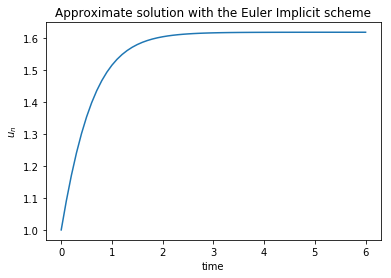

$\min_n \ (v_{n+1}-v_n)=$

1.2137388887278888e-06 



So, for $\delta t=0.1$, the Euler Implicit scheme gives an increasing sequence.

In [6]:
# ODE resolution with an Euler-Implicit scheme
u_EI=np.zeros(Nt)
u_EI[0]=1
for n in range(0,Nt-1):
    u_EI[n+1]=fsolve(g,u_EI[n],args=(t[n+1],u_EI[n],dt))

# plot of the approximate solution
plt.figure()
plt.plot(t,u_EI)
plt.xlabel('time')
plt.ylabel(r'$u_n$')
plt.title('Approximate solution with the Euler Implicit scheme')

plt.show()

display(Markdown(r'$\min_n \ (v_{n+1}-v_n)=$'))
a=min(u_EI[1:Nt-1]-u_EI[0:Nt-2])
print(a,'\n')
if a<0:
    display(Markdown(rf'So, for $\delta t={dt}$, the Euler Implicit scheme does not give an increasing sequence.'))
else:
    display(Markdown(rf'So, for $\delta t={dt}$, the Euler Implicit scheme gives an increasing sequence.'))